## LAB 2 - TASK 2 submission. ML 2023-24.


FILL UP THIS BOX WITH YOUR DETAILS

**NAME AND NIP**:

Eryka Liced Rimacuna Castillo 816778

Luis Catalan Salas            774274


### FILL UP THIS BRIEF DESCRIPTION of your TOY DATASET:

* Number of Classes: 5
* Name of the classes: Abyssinian, american_bulldog, american_pit_bull_terrier, basset_hound, Bengal
* Source of the classes: http://www.robots.ox.ac.uk/~vgg/data/pets/



## 2. Training from scratch

In this exercise we are building a small conv net to train from scratch using Tensorflow.Keras APIs

## Get data and tensorflow imports ready

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, regularizers
from tensorflow.keras import backend as K

import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
from PIL import Image
import os
from tqdm import tqdm
import os
import shutil
from tqdm import tqdm

drive.mount('/content/drive')


folder = '/content/drive/MyDrive/Informatica/Master/Machine_Learning/Practicas_ML/Practica4_816778_774272/'
image_folder = folder + 'images'

file_train_val = folder + 'trainval.txt'
test_name = folder + 'test.txt'
list_name = folder + 'list.txt'

with open(file_train_val, 'r') as f:
    train_val_data_name = f.readlines()

with open(test_name, 'r') as f:
    test_data_name = f.readlines()

with open(list_name, 'r') as f:
    list_data_name = f.readlines()


def extract_x_y(file_read, selected_classes=None):
  X = []
  Y = []
  for line in file_read:
      if line.startswith("#"):
          continue  # Saltar comentarios
      parts = line.split()
      image_name = parts[0]
      class_id = int(parts[1])

      if selected_classes is None:
        X.append(image_name)
        Y.append(class_id)
      else:
        if class_id in selected_classes:
          X.append(image_name)
          Y.append(class_id)


  return X, Y


def get_class_names_and_ids(X, Y):
    """
    Extrae el nombre completo de la clase de cada imagen (sin el número final)
    y asocia el nombre de la clase con su ID.

    Args:
        X (list): Lista de nombres de imágenes (e.g., 'american_pit_bull_terrier_100').
        Y (list): Lista de IDs de clase correspondientes a las imágenes.

    Returns:
        dict: Diccionario donde las claves son nombres de clase y los valores son sus IDs.
    """
    class_names_and_ids = {}

    for image_name, class_id in zip(X, Y):
        # Extraer el nombre de la clase completo, eliminando solo el número final
        class_name = '_'.join(image_name.split('_')[:-1])

        # Añadir al diccionario si la clase aún no está registrada
        if class_name not in class_names_and_ids:
            class_names_and_ids[class_name] = class_id

    # Imprimir por pantalla el resultado
    for class_name, class_id in class_names_and_ids.items():
        print(f"Class Name: {class_name}, Class ID: {class_id}")

    return class_names_and_ids


def organize_images_by_class(X, Y, class_names_id, image_folder, output_folder):
    """
    Organiza las imágenes en subcarpetas según su clase.

    Args:
        X (list): Lista de nombres de imágenes (e.g., 'american_pit_bull_terrier_100').
        Y (list): Lista de IDs de clase correspondientes a las imágenes.
        class_names_id (dict): Diccionario con los nombres de las clases como claves y sus IDs como valores.
        image_folder (str): Carpeta que contiene todas las imágenes originales.
        output_folder (str): Carpeta de destino donde se crearán las subcarpetas por clase.
    """
    # Crear el directorio de destino si no existe
    os.makedirs(output_folder, exist_ok=True)

    # Invertir el diccionario class_names_id para obtener un mapeo de ID a nombre de clase
    id_to_class_name = {v: k for k, v in class_names_id.items()}

    for image_name, class_id in tqdm(zip(X, Y), total=len(X), desc="Organizing images"):
        # Obtener el nombre de la clase usando el ID
        class_name = id_to_class_name[class_id]

        # Crear la subcarpeta de la clase si no existe
        class_folder = os.path.join(output_folder, class_name)
        os.makedirs(class_folder, exist_ok=True)

        # Construir la ruta completa de la imagen original y la ruta de destino
        image_path = os.path.join(image_folder, image_name + '.jpg')  # Ajusta la extensión si es diferente
        target_path = os.path.join(class_folder, image_name + '.jpg')

        # Copiar la imagen a la subcarpeta de su clase
        try:
            shutil.copy(image_path, target_path)
        except FileNotFoundError:
            print(f"Warning: {image_path} not found.")


selected_classes = [1, 2, 3, 4, 6]
X, Y = extract_x_y(list_data_name, selected_classes)
class_names_id = get_class_names_and_ids(X, Y)
# output_folder = folder + 'subclasses_images_5'
# organize_images_by_class(X, Y, class_names_id, image_folder, output_folder)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Class Name: Abyssinian, Class ID: 1
Class Name: american_bulldog, Class ID: 2
Class Name: american_pit_bull_terrier, Class ID: 3
Class Name: basset_hound, Class ID: 4
Class Name: Bengal, Class ID: 6


In [5]:
import numpy as np

def load_images_from_folder(image_names, image_folder):
    X_images = []
    for image_name in tqdm(image_names, desc="Loading images"):  # Añadimos tqdm aquí
        image_path = os.path.join(image_folder, image_name + '.jpg')  # Asegúrate de que la extensión sea correcta
        try:
            image = Image.open(image_path).convert("RGB")  # Convertir a RGB en caso de que haya imágenes en escala de grises
            X_images.append(image)
        except FileNotFoundError:
            print(f"Warning: {image_path} not found.")
    return X_images


selected_classes = [1, 2, 3, 4, 6]
X, Y = extract_x_y(list_data_name, selected_classes)
print(f"Size of X: {len(X)}. Size of Y: {len(Y)}")
# X_images = load_images_from_folder(X, image_folder)
# print(f"Total de imágenes cargadas: {len(X_images)}")

# image_sizes = [img.size for img in X_images]
# widths, heights = zip(*image_sizes)

# Calcular la mediana de ancho y alto
# img_width = int(np.median(widths))
# img_height = int(np.median(heights))

# print(f"Tamaño recomendado: {(img_width, img_height)}")

Size of X: 998. Size of Y: 998


In [6]:
# SOME HELPER FUNCTIONS TO VISUALIZE RESULTS
def vis_history(results_history):
    acc = results_history.history['accuracy']
    val_acc = results_history.history['val_accuracy']

    loss = results_history.history['loss']
    val_loss = results_history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

## Definning and training the CNN
You need to train 3 versions of this model:
* First run and train the model given here by default.
* Then evaluate what happens if you remove Dropout layer and train again.
* Then add code to incorporate image augmentation to the network training.

Use this example to see how to easily add data augmentation as an additional layer to your model. https://www.tensorflow.org/tutorials/images/classification#data_augmentation

Think what data augmentation could be interesting for your classes and program the layer to get it.

In [7]:
####### ***** TO-DO-LAB *****  #######
# make sure you config these params to fit what you want/need

image_folder = folder + 'subclasses_images_5/'

# dimensions of our images.
img_width, img_height = 150, 150
# MODIFY THE PATH TO POINT TO YOUR DATA! locally here or in your mounted drive
data_dir = image_folder # all in one folder and let the system do the split
nb_train_samples = 698 # UPDATE WITH YOUR NUMBERS!!
nb_validation_samples = 150 # UPDATE WITH YOUR NUMBERS!!
epochs = 10 # 50 # UPDATE WITH YOUR NUMBERS!!
batch_size = 4 #16
num_classes = 5
####### ***** TO-DO-LAB *****  #######

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2, #1
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# for more optimized handling of the data
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

#### *************** TO-DO-LAB *************** ####
# DEFINE a SECOND MODEL that does NOT INCLUDE DROPOUT, compile it and train it
model2 = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])
#
# DEFINE a BETTER MODEL that INCLUDES DROPOUT AND AUGMENTATION, compile it and train it
data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
    layers.RandomTranslation(0.1, 0.1),
])

model3 = Sequential([
    data_augmentation,  # Capa de Data Augmentation
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model4 = Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

#### *************** END TO-DO-LAB *************** ####


def compile_and_execute(model, try_attemp):
  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
  model.summary()
  print("##########################################################################")
  print("TRAINING MODEL " + try_attemp)
  print("##########################################################################")
  history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
  )
  model.save_weights(try_attemp + '_try.weights.h5')
  return history

Found 998 files belonging to 5 classes.
Using 799 files for training.
Found 998 files belonging to 5 classes.
Using 199 files for validation.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = compile_and_execute(model, "first")

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_11 (Rescaling)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 150, 150, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 75, 75, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 75, 75, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 37, 37, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 37, 37, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 18, 18, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 18, 18, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 20736)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │       2,654,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,678,565 (10.22 MB)

 Trainable params: 2,678,565 (10.22 MB)

 Non-trainable params: 0 (0.00 B)

##########################################################################
TRAINING MODEL 2
##########################################################################
Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 89s 150ms/step - accuracy: 0.2360 - loss: 1.8034 - val_accuracy: 0.3216 - val_loss: 1.5917
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 30s 150ms/step - accuracy: 0.4229 - loss: 1.4428 - val_accuracy: 0.4171 - val_loss: 1.3780
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 42s 157ms/step - accuracy: 0.5684 - loss: 1.1148 - val_accuracy: 0.4472 - val_loss: 1.3222
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 37s 138ms/step - accuracy: 0.7491 - loss: 0.6803 - val_accuracy: 0.4673 - val_loss: 1.4766
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 42s 142ms/step - accuracy: 0.8750 - loss: 0.3485 - val_accuracy: 0.4422 - val_loss: 2.0370
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 42s 145ms/step - accuracy: 0.9328 - loss: 0.2157 - val_accuracy: 0.4523 - val_loss: 2.8948
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 28s 141

In [ ]:
history2 = compile_and_execute(model2, "second")

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_12 (Rescaling)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 150, 150, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_36 (MaxPooling2D)      │ (None, 75, 75, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 75, 75, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_37 (MaxPooling2D)      │ (None, 37, 37, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 37, 37, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_38 (MaxPooling2D)      │ (None, 18, 18, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 20736)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 128)                 │       2,654,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,678,565 (10.22 MB)

 Trainable params: 2,678,565 (10.22 MB)

 Non-trainable params: 0 (0.00 B)

##########################################################################
TRAINING MODEL 2
##########################################################################
Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 31s 144ms/step - accuracy: 0.2285 - loss: 1.6694 - val_accuracy: 0.2764 - val_loss: 1.5873
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 28s 141ms/step - accuracy: 0.4128 - loss: 1.4172 - val_accuracy: 0.4020 - val_loss: 1.4191
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 29s 144ms/step - accuracy: 0.6344 - loss: 0.9258 - val_accuracy: 0.4121 - val_loss: 1.5031
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 28s 139ms/step - accuracy: 0.8389 - loss: 0.5046 - val_accuracy: 0.3819 - val_loss: 1.7659
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 42s 142ms/step - accuracy: 0.9338 - loss: 0.2157 - val_accuracy: 0.3719 - val_loss: 2.9306
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 40s 139ms/step - accuracy: 0.9399 - loss: 0.1687 - val_accuracy: 0.4322 - val_loss: 3.5530
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 29s 144

In [8]:
history3 = compile_and_execute(model3, "third")

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)            │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_2 (Rescaling)              │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 150, 150, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 75, 75, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 75, 75, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 37, 37, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 37, 37, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 18, 18, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 18, 18, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 20736)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       2,654,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,678,565 (10.22 MB)

 Trainable params: 2,678,565 (10.22 MB)

 Non-trainable params: 0 (0.00 B)

##########################################################################
TRAINING MODEL third
##########################################################################
Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 181s 315ms/step - accuracy: 0.2191 - loss: 1.6307 - val_accuracy: 0.2362 - val_loss: 1.5997
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 37s 185ms/step - accuracy: 0.2841 - loss: 1.5745 - val_accuracy: 0.3065 - val_loss: 1.4810
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 37s 185ms/step - accuracy: 0.3415 - loss: 1.4847 - val_accuracy: 0.3668 - val_loss: 1.4455
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 36s 178ms/step - accuracy: 0.3238 - loss: 1.4760 - val_accuracy: 0.3266 - val_loss: 1.4854
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 35s 174ms/step - accuracy: 0.3483 - loss: 1.4547 - val_accuracy: 0.3568 - val_loss: 1.4272
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 38s 192ms/step - accuracy: 0.3357 - loss: 1.4598 - val_accuracy: 0.3869 - val_loss: 1.4749
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 37

In [ ]:
history4 = compile_and_execute(model4, "third")

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_20 (Sequential)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_17 (Rescaling)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_51 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_51 (MaxPooling2D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_52 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_52 (MaxPooling2D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_53 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_53 (MaxPooling2D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_17 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

##########################################################################
TRAINING MODEL third
##########################################################################
Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 39s 177ms/step - accuracy: 0.1933 - loss: 1.7421 - val_accuracy: 0.1508 - val_loss: 1.7028
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 41s 176ms/step - accuracy: 0.1992 - loss: 1.6275 - val_accuracy: 0.2864 - val_loss: 1.5416
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 36s 183ms/step - accuracy: 0.2975 - loss: 1.5516 - val_accuracy: 0.3819 - val_loss: 1.4704
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 35s 174ms/step - accuracy: 0.3213 - loss: 1.5191 - val_accuracy: 0.2714 - val_loss: 1.8191
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 35s 173ms/step - accuracy: 0.3519 - loss: 1.4840 - val_accuracy: 0.4121 - val_loss: 1.4147
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 42s 177ms/step - accuracy: 0.3727 - loss: 1.4287 - val_accuracy: 0.4322 - val_loss: 1.3764
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 34s

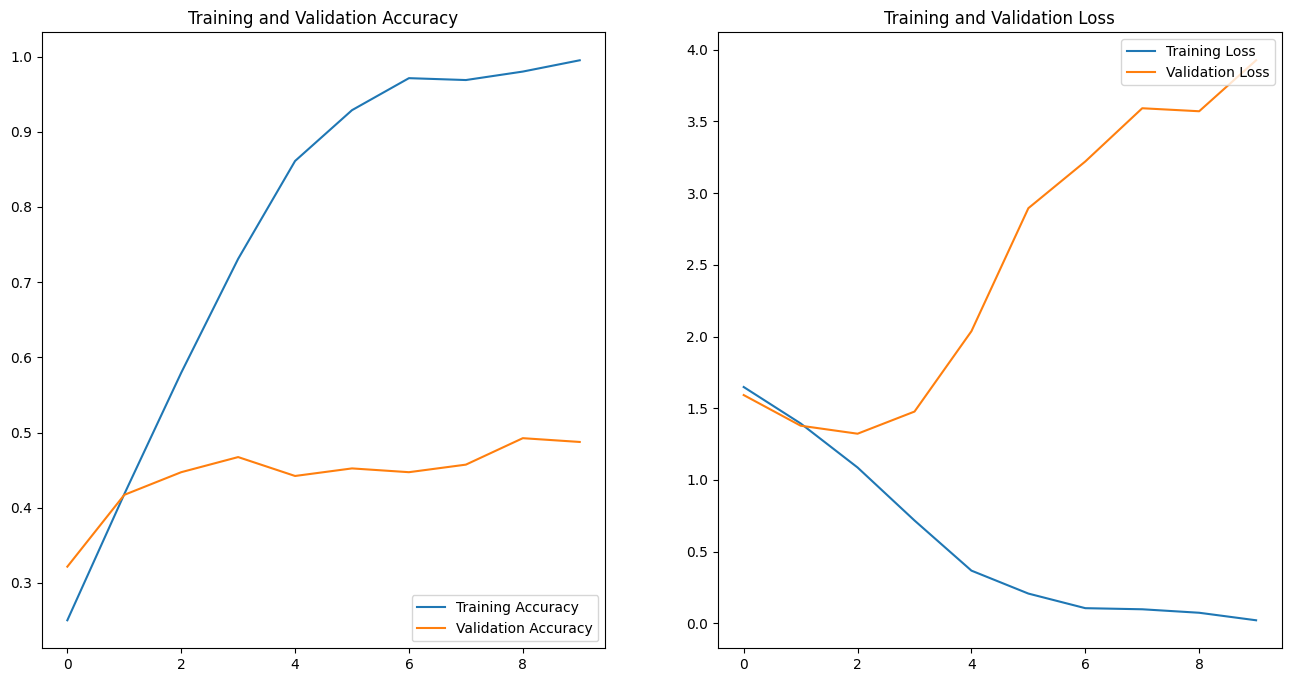

In [ ]:
# VISUALIZE INITIAL RESULTS
vis_history(history)

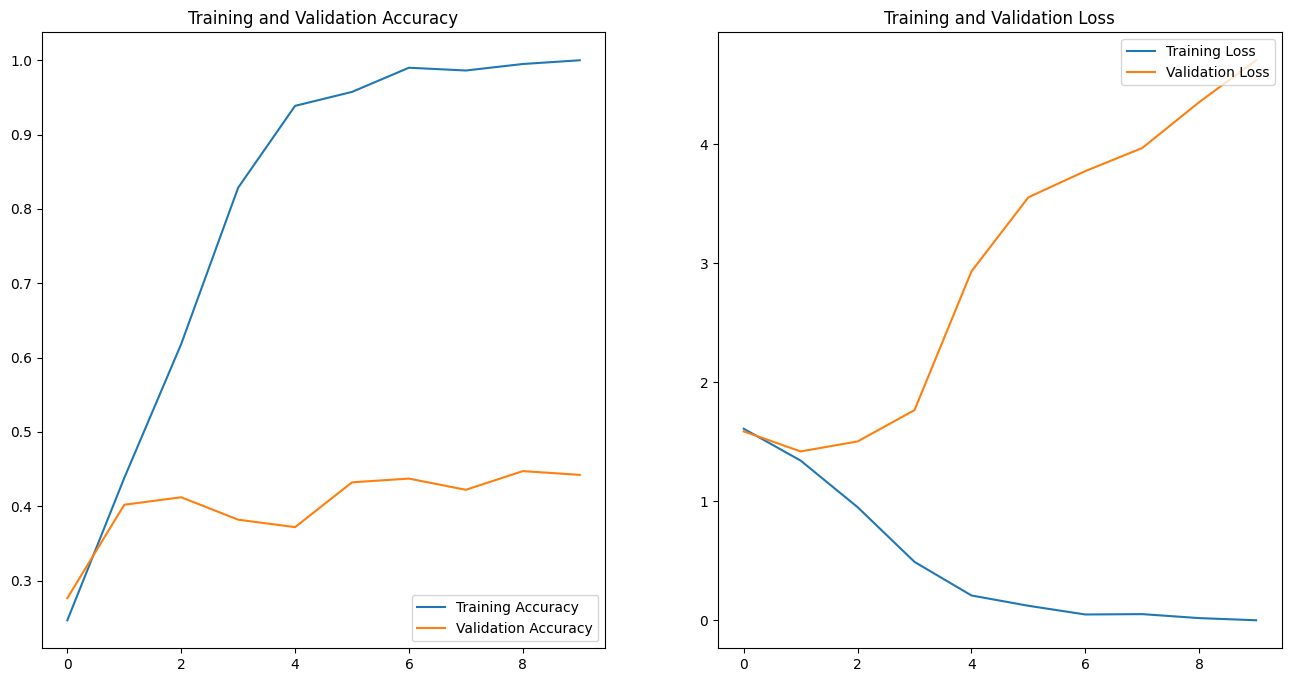

In [ ]:
# PLOT HERE YOUR RESULTS WITHOUT DROPOUT
vis_history(history2)

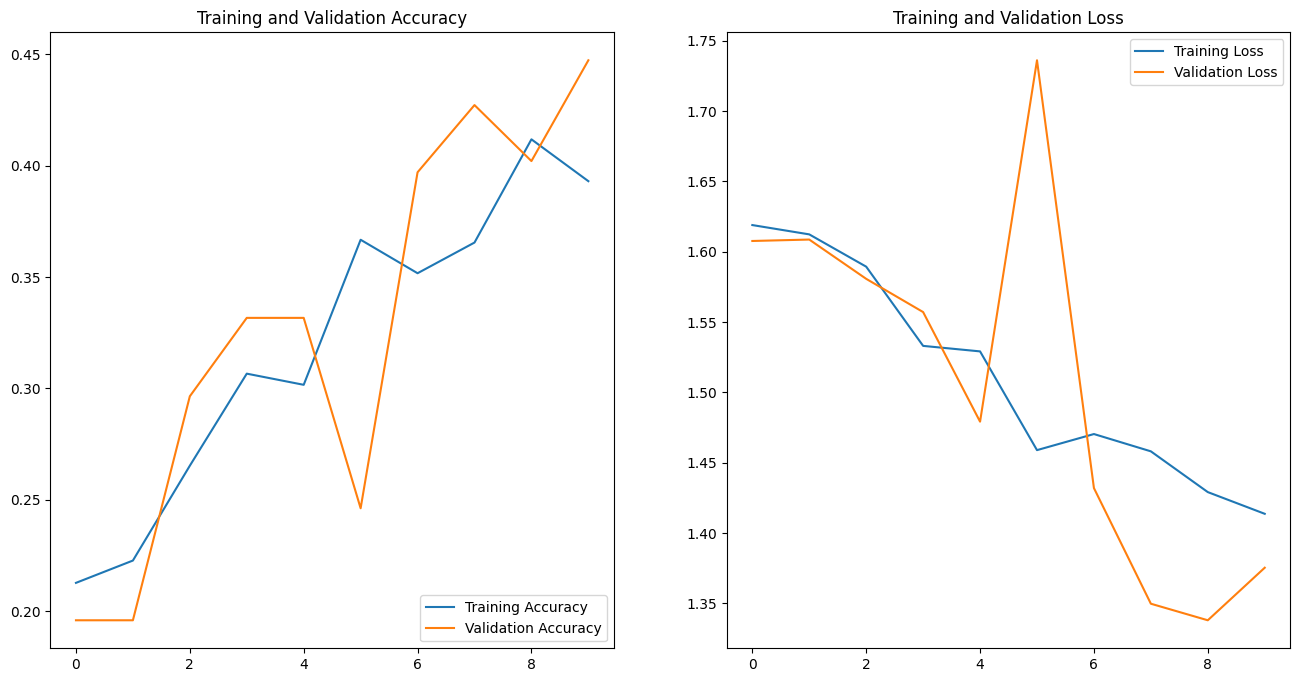

In [ ]:
# PLOT HERE YOUR RESULTS INCLUDING DROPOUT and AUGMENTATION
vis_history(history3)

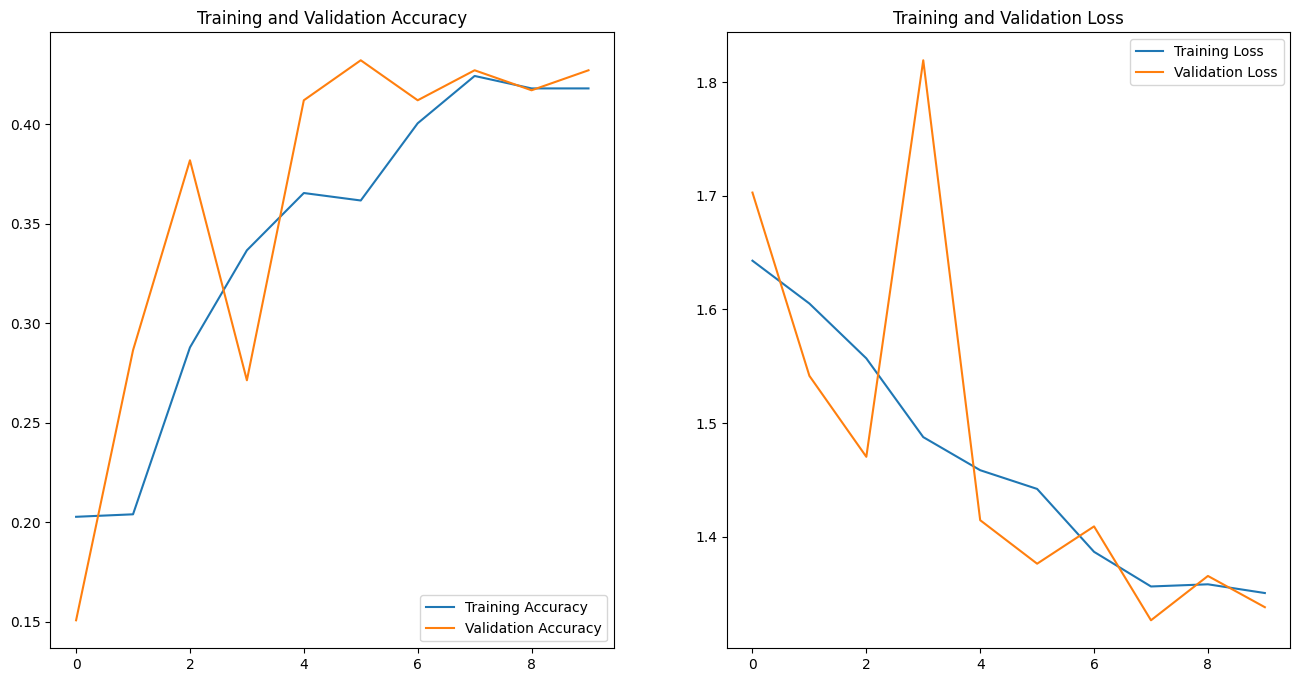

In [ ]:
vis_history(history4)

### **QUESTION:** briefly discuss the results of the CNN with the different variations (with/without augmentation, with/without dropout). (maximum of 5 lines)

ANSWER: Without Dropout: Training accuracy reaches nearly perfect levels, but validation accuracy plateaus early, showing signs of overfitting.

With Dropout: Dropout reduces overfitting. However, the gap between training and validation loss suggests dropout alone isn't sufficient to completely prevent overfitting.

With Augmentation and Dropout: Both training and validation accuracy improve steadily with minimal overfitting, and the validation loss shows less fluctuation, suggesting that augmentation combined with dropout enhances the model's generalization.

# OPTIONAL

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, regularizers
import numpy as np
import tensorflow as tf

# SOME HELPER FUNCTIONS TO VISUALIZE RESULTS
def vis_history(results_history):
    acc = results_history.history['accuracy']
    val_acc = results_history.history['val_accuracy']

    loss = results_history.history['loss']
    val_loss = results_history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()


def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=10000):
    """
    Load the CIFAR-10 dataset and perform preprocessing to prepare
    it for the two-layer neural net classifier.
    """
    # Load the raw CIFAR-10 dataset
    data_cifar10 = cifar10.load_data()
    (X_train, y_train), (X_test, y_test) = data_cifar10
    X_train = np.asarray(X_train, dtype=np.float32)
    y_train = np.asarray(y_train, dtype=np.int32).flatten()
    X_test = np.asarray(X_test, dtype=np.float32)
    y_test = np.asarray(y_test, dtype=np.int32).flatten()

    # Subsample the data
    mask = range(num_training, num_training + num_validation)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = range(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]

    return X_train, y_train, X_val, y_val, X_test, y_test

epochs = 12 # 50 # UPDATE WITH YOUR NUMBERS!!
batch_size = 16 #16
num_classes = 10

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

X_train = X_train.astype("float32")
y_train = y_train.astype("int32")
X_val = X_val.astype("float32")
y_val = y_val.astype("int32")

_, img_height, img_width, _ = X_train.shape
print(f"input shape: ({img_height}, {img_width}, 3)")
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)



input shape: (32, 32, 3)
Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


In [ ]:
def compile_and_execute(model, try_attemp, X_train, y_train, X_val, y_val, epochs=10, batch_size=32):
  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
  model.summary()
  print("##########################################################################")
  print("TRAINING MODEL " + try_attemp)
  print("##########################################################################")
  history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_val, y_val)
  )
  model.save_weights(try_attemp + '_try.weights.h5')
  return history, model


data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
    layers.RandomTranslation(0.1, 0.1),
])

modelCNN = Sequential([
    data_augmentation,  # Capa de Data Augmentation
    layers.Rescaling(1./255),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes)
])


data_augmentation2 = Sequential([
    layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),  # Smaller rotation (10%)
    layers.RandomZoom(0.1),  # Smaller zoom (10%)
])

modelCNN2 = Sequential([
    data_augmentation2,
    layers.Rescaling(1./255),

    layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),

    layers.Conv2D(128, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),

    layers.Conv2D(256, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.4),

    layers.Conv2D(512, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])





data_augmentation3 = Sequential([
    layers.RandomFlip("horizontal_and_vertical", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
    layers.RandomTranslation(0.1, 0.1),
])

modelCNN3 = Sequential([
    data_augmentation3,
    layers.Rescaling(1./255),

    layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),

    layers.Conv2D(128, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),

    layers.Conv2D(256, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.4),

    layers.Conv2D(512, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [ ]:
history, modelCNN = compile_and_execute(modelCNN, "cifar", X_train, y_train, X_val, y_val, epochs, batch_size)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

##########################################################################
TRAINING MODEL cifar
##########################################################################
Epoch 1/15
3063/3063 ━━━━━━━━━━━━━━━━━━━━ 177s 55ms/step - accuracy: 0.2407 - loss: 2.0225 - val_accuracy: 0.3700 - val_loss: 1.6959
Epoch 2/15
3063/3063 ━━━━━━━━━━━━━━━━━━━━ 201s 55ms/step - accuracy: 0.3626 - loss: 1.7542 - val_accuracy: 0.4630 - val_loss: 1.4738
Epoch 3/15
3063/3063 ━━━━━━━━━━━━━━━━━━━━ 202s 55ms/step - accuracy: 0.4049 - loss: 1.6521 - val_accuracy: 0.4840 - val_loss: 1.4802
Epoch 4/15
3063/3063 ━━━━━━━━━━━━━━━━━━━━ 200s 54ms/step - accuracy: 0.4198 - loss: 1.6136 - val_accuracy: 0.4800 - val_loss: 1.4450
Epoch 5/15
3063/3063 ━━━━━━━━━━━━━━━━━━━━ 206s 55ms/step - accuracy: 0.4394 - loss: 1.5654 - val_accuracy: 0.4990 - val_loss: 1.3906
Epoch 6/15
3063/3063 ━━━━━━━━━━━━━━━━━━━━ 200s 55ms/step - accuracy: 0.4532 - loss: 1.5439 - val_accuracy: 0.4960 - val_loss: 1.3749
Epoch 7/15
3063/3063 ━━━━━━━━━━

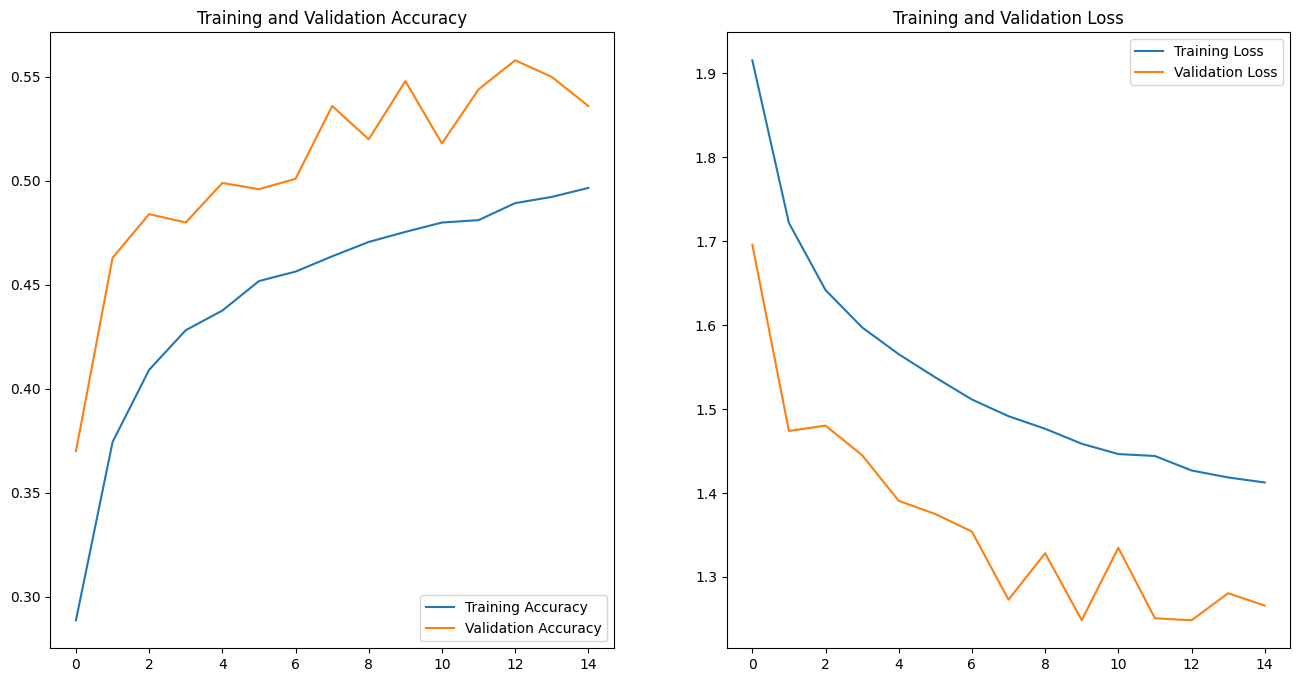

In [ ]:
vis_history(history)

In [ ]:
history2, modelCNN2 = compile_and_execute(modelCNN2, "cifar2", X_train, y_train, X_val, y_val, epochs, batch_size)

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_14 (Sequential)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_7 (Rescaling)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

##########################################################################
TRAINING MODEL cifar2
##########################################################################
Epoch 1/12
3063/3063 ━━━━━━━━━━━━━━━━━━━━ 668s 216ms/step - accuracy: 0.2600 - loss: 3.5163 - val_accuracy: 0.3980 - val_loss: 2.4467
Epoch 2/12
3063/3063 ━━━━━━━━━━━━━━━━━━━━ 660s 215ms/step - accuracy: 0.3630 - loss: 2.5403 - val_accuracy: 0.5180 - val_loss: 2.1574
Epoch 3/12
3063/3063 ━━━━━━━━━━━━━━━━━━━━ 679s 214ms/step - accuracy: 0.4079 - loss: 2.5069 - val_accuracy: 0.4310 - val_loss: 2.4971
Epoch 4/12
3063/3063 ━━━━━━━━━━━━━━━━━━━━ 657s 215ms/step - accuracy: 0.4567 - loss: 2.4234 - val_accuracy: 0.5390 - val_loss: 2.2052
Epoch 5/12
3063/3063 ━━━━━━━━━━━━━━━━━━━━ 685s 216ms/step - accuracy: 0.4753 - loss: 2.2631 - val_accuracy: 0.5870 - val_loss: 1.9585
Epoch 6/12
3063/3063 ━━━━━━━━━━━━━━━━━━━━ 659s 215ms/step - accuracy: 0.4951 - loss: 2.1580 - val_accuracy: 0.5030 - val_loss: 2.1484
Epoch 7/12
3063/3063 ━━━

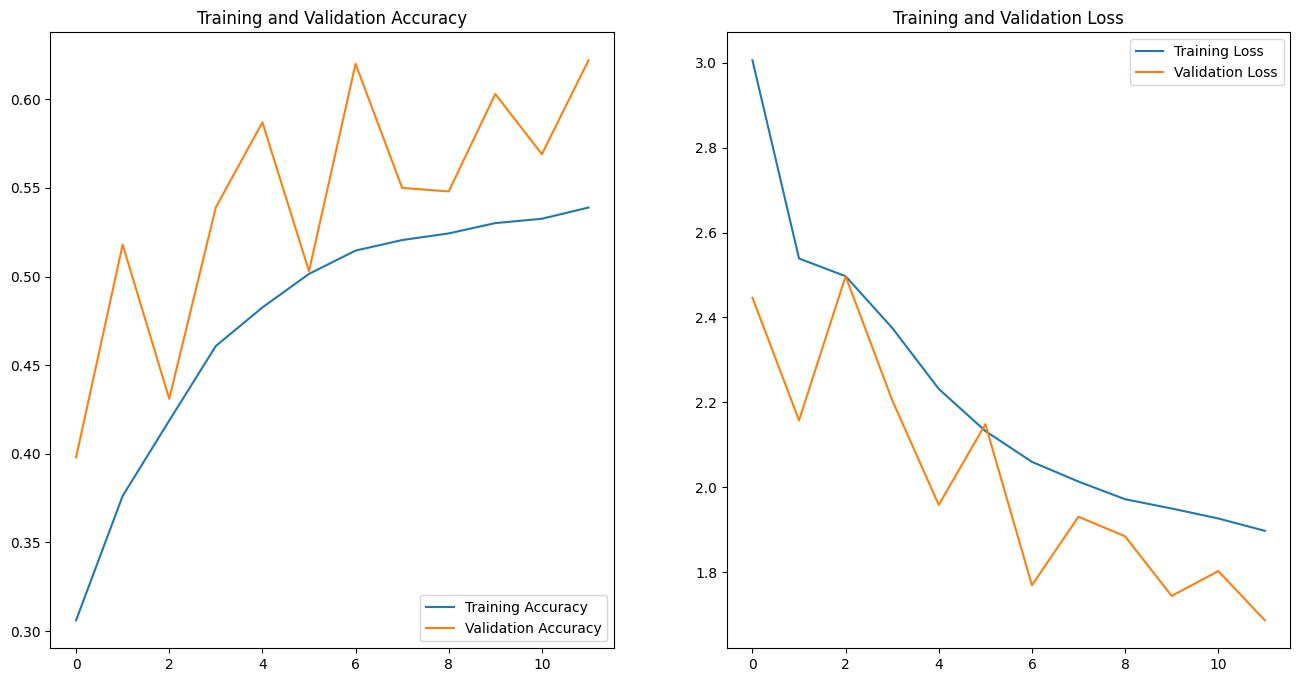

In [ ]:
vis_history(history2)

In [ ]:
history3, modelCNN3 = compile_and_execute(modelCNN3, "cifar3", X_train, y_train, X_val, y_val, epochs, batch_size)

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_12 (Sequential)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_6 (Rescaling)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

##########################################################################
TRAINING MODEL cifar3
##########################################################################
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


3063/3063 ━━━━━━━━━━━━━━━━━━━━ 795s 256ms/step - accuracy: 0.1881 - loss: 3.7103 - val_accuracy: 0.2410 - val_loss: 2.5342
Epoch 2/10
3063/3063 ━━━━━━━━━━━━━━━━━━━━ 772s 252ms/step - accuracy: 0.2368 - loss: 2.5629 - val_accuracy: 0.1900 - val_loss: 2.5358
Epoch 3/10
3063/3063 ━━━━━━━━━━━━━━━━━━━━ 797s 251ms/step - accuracy: 0.2456 - loss: 2.4968 - val_accuracy: 0.2860 - val_loss: 2.3577
Epoch 4/10
3063/3063 ━━━━━━━━━━━━━━━━━━━━ 799s 250ms/step - accuracy: 0.2766 - loss: 2.3969 - val_accuracy: 0.2870 - val_loss: 2.3339
Epoch 5/10
3063/3063 ━━━━━━━━━━━━━━━━━━━━ 753s 246ms/step - accuracy: 0.3048 - loss: 2.2897 - val_accuracy: 0.3760 - val_loss: 2.0005
Epoch 6/10
3063/3063 ━━━━━━━━━━━━━━━━━━━━ 813s 250ms/step - accuracy: 0.3273 - loss: 2.2137 - val_accuracy: 0.3830 - val_loss: 2.0485
Epoch 7/10
3063/3063 ━━━━━━━━━━━━━━━━━━━━ 762s 249ms/step - accuracy: 0.3324 - loss: 2.1768 - val_accuracy: 0.3810 - val_loss: 2.0000
Epoch 8/10
3063/3063 ━━━━━━━━━━━━━━━━━━━━ 796s 247ms/step - accuracy: 0.3

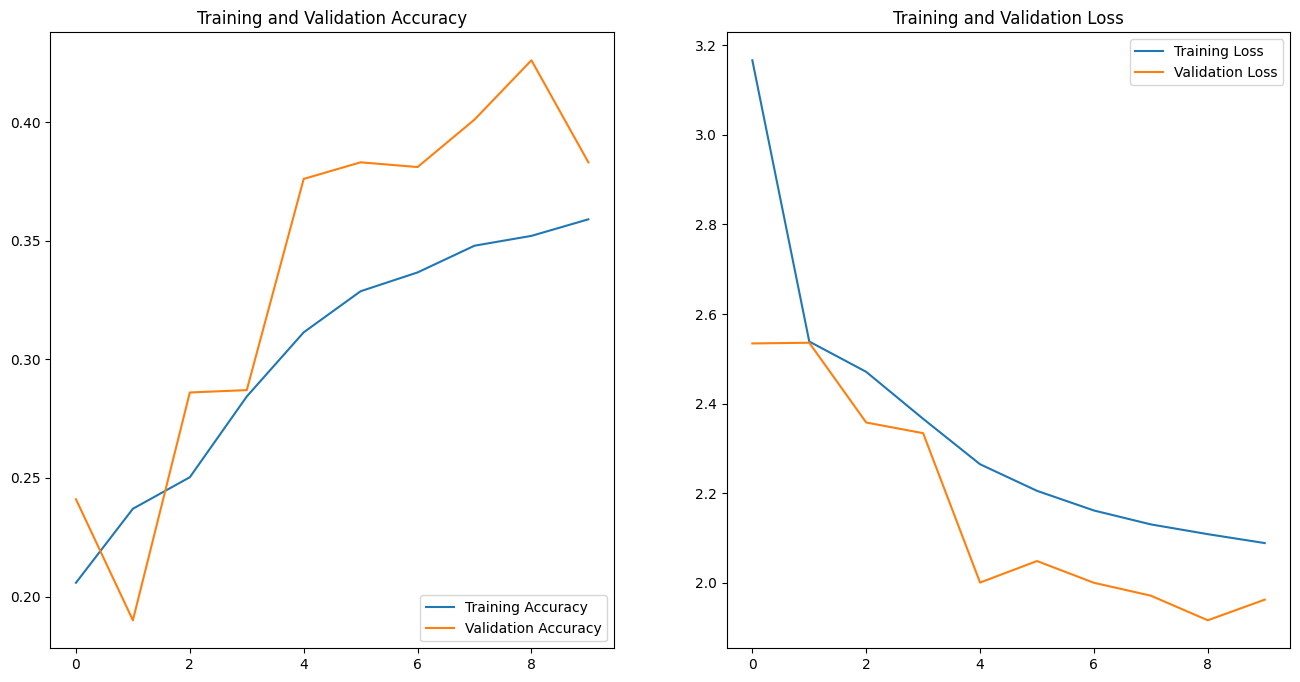

In [ ]:
vis_history(history3)

# Test

625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.6056 - loss: 1.7536
Test Loss: 1.7591972351074219
Test Accuracy: 0.5996999740600586
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 44ms/step
Aciertos: 5997/10000 = 0.5997


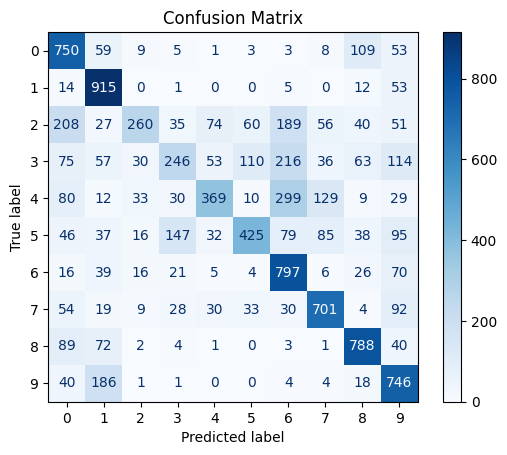

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Evaluate model on test data
test_loss, test_accuracy = modelCNN2.evaluate(X_test, y_test, batch_size=batch_size)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Get predictions
y_pred_probs = modelCNN2.predict(X_test, batch_size=batch_size)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the number of correct predictions (aciertos)
correct_predictions = np.trace(conf_matrix)  # Sum of the diagonal elements
total_predictions = np.sum(conf_matrix)  # Total number of samples

# Print aciertos/total
print(f"Aciertos: {correct_predictions}/{total_predictions} = {correct_predictions/total_predictions:.4f}")

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=range(10))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


**Model 1**

Training and validation accuracy are steady but capped at 0.55.
The simpler architecture limits capacity, and aggressive augmentation might add noise.


**Model 2**

Achieves the highest validation accuracy (0.60) with better generalization.
Regularization (L2) and batch normalization stabilize training and reduce overfitting.

**Model 3**

Larger gap between training and validation accuracy, indicating overfitting.
High dropout and aggressive augmentation may hinder generalization.



Model 2 performs best due to its balanced architecture and effective use of regularization and moderate data augmentation.





As we know: The classes correspond to the following categories

0: Airplane
1: Automobile
2: Bird
3: Cat
4: Deer
5: Dog
6: Frog
7: Horse
8: Ship
9: Truck

As we can seein the confusion matrix:

*   Frog (class 6) and Automobile (class 1) show very high accuracy. These classes likely have distinct features

*   Cat (class 3) and Dog (class 5) have significant confusion. For instance, many cats are misclassified as dogs (216) and vice versa

*   Truck (class 9) is often confused with Automobile (class 1), with 186 misclassifications.

